## Libraries required for running the code

In [14]:
# Importing the important libraries required for this machine learning technique
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

## Loading and Description of the Dataset

In [15]:
# Transfering data from the CSV file to a dataframe df
df = pd.read_csv("C:/Users/Nishant Moona/Downloads/Capstone Data.csv")

In [16]:
# General Information about the dataset
ir = df.shape[0]
ic = df.shape[1]
print("The total number of observations in the given dataset are: ", ir)
print("The total number of features/dimensions of the given dataset are: ", ic-1)
print("The target KPI is: ", "BMA_pol_auto")

The total number of observations in the given dataset are:  51546
The total number of features/dimensions of the given dataset are:  195
The target KPI is:  BMA_pol_auto


In [17]:
# The data types for each of the features/dimensions of the given dataset
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51546 entries, 0 to 51545
Data columns (total 196 columns):
 #    Column                           Dtype  
---   ------                           -----  
 0    id17                             int64  
 1    id18                             int64  
 2    id21                             float64
 3    id55                             float64
 4    id58_1                           int64  
 5    id58_2                           int64  
 6    id58_3                           int64  
 7    id59                             float64
 8    id60                             float64
 9    id61                             float64
 10   id70                             int64  
 11   ValorVehiculoMercado             float64
 12   SINCOTotalVehiculos              float64
 13   DGT_001                          float64
 14   DGT_002                          float64
 15   DGC_001                          float64
 16   DGC_002                          float

In [18]:
# Statistical description of each feature in the dataset
df.describe()

,id17,id18,id21,id55,id58_1,id58_2,id58_3,id59,id60,id61,...,NotaLUA_B,NotaLUA_C,NotaLUA_D,NotaLUA_E,NotaLUA_F,NotaLUA_G,SINCO,Cliente_Diverso,BMA_pol,BMA_pol_auto
count,51546.000000,51546.000000,51546.000000,51546.000000,51546.000000,51546.000000,51546.000000,51546.000000,51546.000000,51546.000000,...,51546.000000,51546.000000,51546.000000,51546.000000,51546.000000,51546.000000,51546.0,51546.000000,51546.000000,51546.000000
mean,296.033892,179.140942,21381.973629,-46.621367,0.193497,0.419664,0.073042,904.412240,138.315077,520.706975,...,0.038490,0.104722,0.159566,0.291313,0.203255,0.167811,1.0,0.642028,48.019878,45.242747
std,258.479784,208.867095,17459.321966,10.232688,0.538048,0.880897,0.557700,4845.141251,721.748287,5538.067504,...,0.192378,0.306198,0.366207,0.454372,0.402425,0.373702,0.0,0.479408,2288.083131,2479.687340
min,20.000000,0.000000,1008.000000,-52.500000,0.000000,0.000000,0.000000,-19.860000,-60.910000,-3282.730000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,-185990.403800,-185990.403800
25%,36.000000,41.000000,3690.000000,-50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,81.573318,75.253375
50%,200.000000,107.000000,17442.500000,-50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,182.049500,181.123669
75%,461.000000,201.000000,41350.000000,-47.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,1.000000,267.787780,272.209048
max,900.000000,999.000000,52006.000000,250.000000,53.000000,53.000000,105.000000,415182.410000,53166.370000,706072.550000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,28207.913410,28207.913410


## Data Pre-processing

In [19]:
# Remove insignificant feature columns from the dataset whose data is unavailable
df = df.drop(['BMA_pol','PrimaTotalPoliza', 'ComisionTotalPoliza', 'SiniestralidadTotalPoliza', 'ExposicionTotalPoliza'], axis=1)

In [20]:
# find the number of null values in the dataset

pd.set_option('display.max_rows', None)
print(df.isna().sum())

# find the features where null values exist

null_cols = [columns for columns in df.columns if df[columns].isna().sum() != 0]
if len(null_cols) == 0:
    print("There are no null columns in the dataset")
else:
    print(f'There are {len(null_cols)} in the dataset')
    print("The features having null values are as below:- ")
    print(",".join(null_cols))
    
# Removal of null columns
if len(null_cols) != 0:
    df = df.dropna(axis = 1)
     

id17                               0
id18                               0
id21                               0
id55                               0
id58_1                             0
id58_2                             0
id58_3                             0
id59                               0
id60                               0
id61                               0
id70                               0
ValorVehiculoMercado               0
SINCOTotalVehiculos                0
DGT_001                            0
DGT_002                            0
DGC_001                            0
DGC_002                            0
DGC_003                            0
DGC_004                            0
DGC_005                            0
DGC_006                            0
DGC_007                            0
DGC_008                            0
DGC_009                            0
DGC_010                            0
DGC_011                            0
DGC_012                            0
D

In [21]:
# Checking for duplicated values

if df[df.duplicated()].shape[0] == 0:
    print("There are no duplicated rows in the dataset")
else:
    print("The number of duplicated rows in the dataset are",df[df.duplicated()].shape[0])

# Removal of duplicated values from the dataset

if df[df.duplicated()].shape[0] != 0:
    df.drop_duplicates()

There are no duplicated rows in the dataset


In [22]:
# Converting the target KPI (BMA_pol_auto) into a categorical variable for Classification
df['Profitability'] = [0 if df.loc[i,'BMA_pol_auto'] > 0 else 1 for i in range(df.shape[0])]

In [23]:
# Splitting the dataset into Independent Feature Variables and Target Variable

y = df['Profitability']
X = df.drop(['Profitability'], axis = 1)

# Splitting the dataset into Training & Validation and Test datasets
X_train_val,X_test,y_train_val,y_test = train_test_split(X,y,test_size = 0.20, random_state = 123)

# Splitting the Training and Validation dataset into Training and Validation datasets
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val, test_size = 0.25, random_state = 123)

# Dropping the target variable "BMA_Pol_auto" from the training and validation dataset
X_train = X_train.drop(['BMA_pol_auto'], axis = 1)
X_val = X_val.drop(['BMA_pol_auto'], axis = 1)

# Printing a summary of the training, testing and validation dataset

print(f"The total number of observations of the training dataset is {X_train.shape[0]}")
print(f"The total number of observations of the validation dataset is {X_val.shape[0]}")
print(f"The total number of observations of the testing dataset is {X_test.shape[0]}")

The total number of observations of the training dataset is 30927
The total number of observations of the validation dataset is 10309
The total number of observations of the testing dataset is 10310


The training dataset will be used for training the learning algorithm. The validation dataset will be used for finding the optimal number of features based on feature importance using the trained algorithm. The test set will be used for determining the accuracy of the models used

## XGBoost Classifier Algorithm

In [12]:
# Fitting the XGBoost Algorithm on the training dataset

xgb = XGBClassifier()
xgb.fit(X_train,y_train)

# Predicting the target variable using the trained model

y_pred = xgb.predict(X_val)

# Classification Report

print("The Classification report for XGBoost Classifier", end = "\n\n")
print(classification_report(y_val, y_pred))

# Importance of each attribute/features

xgb_results = pd.DataFrame(X_train.columns)
xgb_results.rename(columns = {0:"Feature Names"}, inplace = True)
xgb_results['Feature Importance'] = xgb.feature_importances_
print("----------------------------------------------------")
print("The List of Features and their respective importance", end = "\n")
xgb_results

The Classification report for XGBoost Classifier

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      8372
           1       0.58      0.22      0.32      1937

    accuracy                           0.82     10309
   macro avg       0.71      0.59      0.61     10309
weighted avg       0.79      0.82      0.79     10309

----------------------------------------------------
The List of Features and their respective importance


,Feature Names,Feature Importance
0,id17,0.003899
1,id18,0.004178
2,id21,0.006437
3,id55,0.035281
4,id58_1,0.004354
5,id58_2,0.005569
6,id58_3,0.004819
7,id59,0.004690
8,id60,0.005608
9,id61,0.004577


In [13]:
# Listing the Feature importances and metric scores used for validating the ML model
d = xgb.feature_importances_
r = list(X.columns)
max_imp = max(d)
min_imp = min(d)
val = list(np.linspace(max_imp, min_imp, 50))
f1_scores = []
recall_scores = []
precision_scores = []
roc_auc_scores = []
overall_accuracy_scores = []
list_of_predictors = []
No_of_predictors = []
for value in val:
    u = []
    columns = [u.append(r[i]) for i in range(len(d)) if d[i] >= value]
    # print(u)
    list_of_predictors.append(u)
    No_of_predictors.append(len(u))
    X_training = X_train[u]
    X_value = X_val[u]
    # print(X.columns)
    
    # X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val, test_size = 0.25)
    xgb = XGBClassifier()
    xgb.fit(X_training,y_train)
    y_pred = xgb.predict(X_value)
    recall = recall_score(y_val,y_pred)
    precision = precision_score(y_val,y_pred)
    Overall_Accuracy = accuracy_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val,y_pred)
    f1 = f1_score(y_val,y_pred)
    recall_scores.append(recall)
    precision_scores.append(precision)
    roc_auc_scores.append(roc_auc)
    overall_accuracy_scores.append(Overall_Accuracy)
    f1_scores.append(f1)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


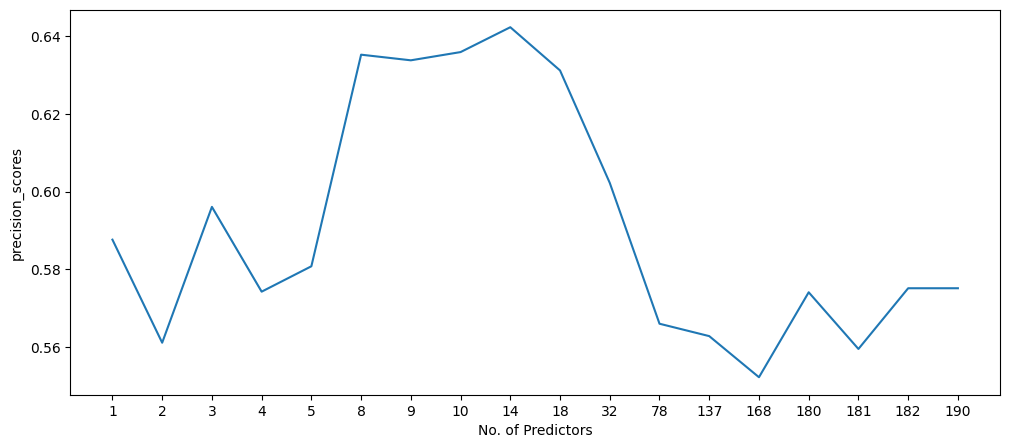

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


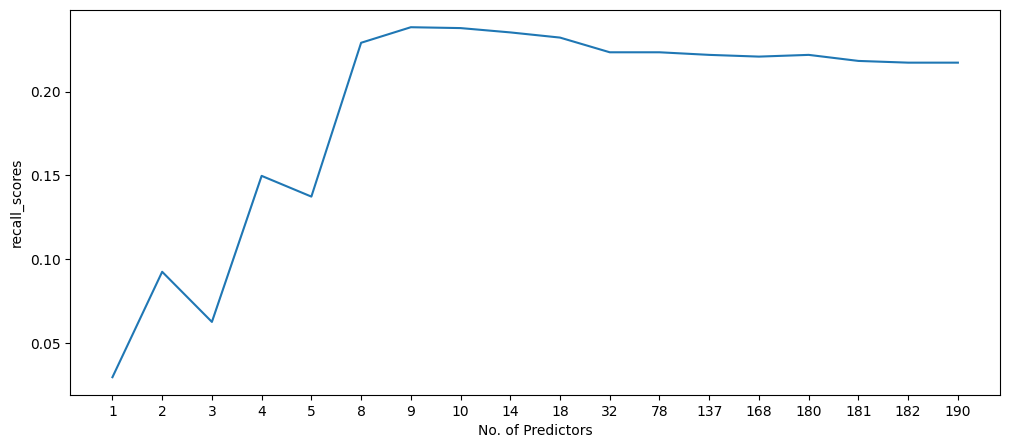

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


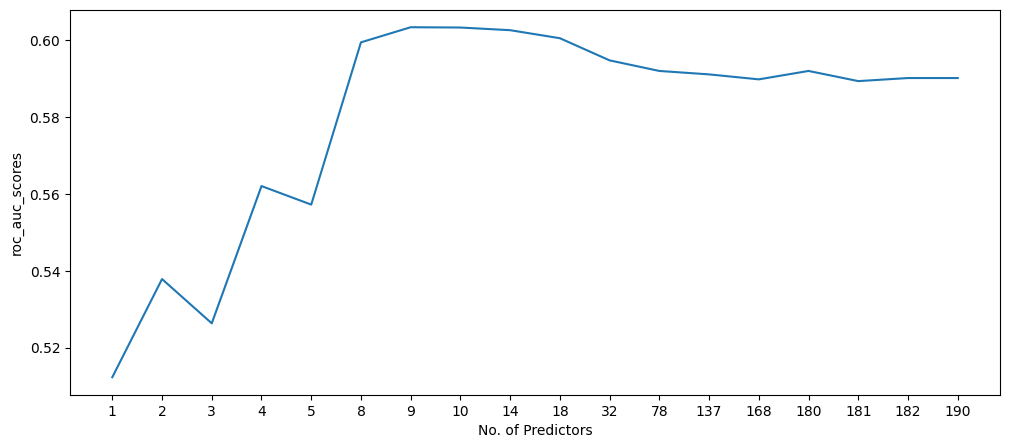

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


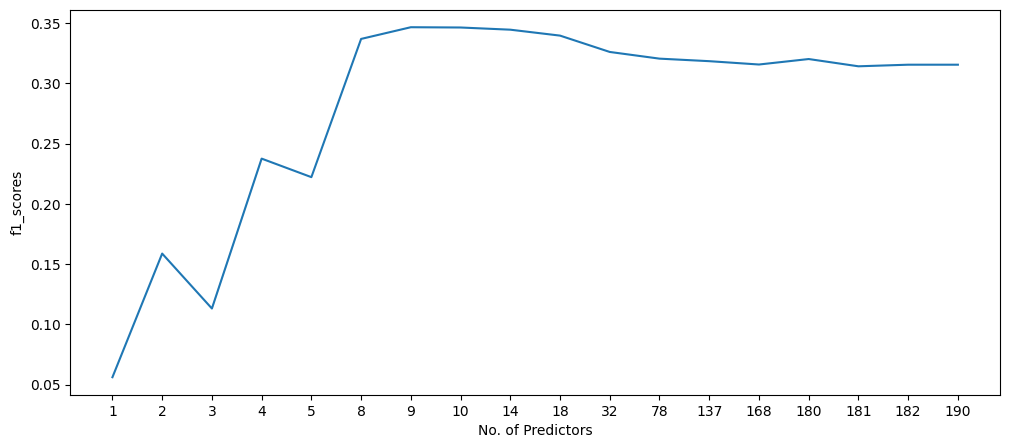

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


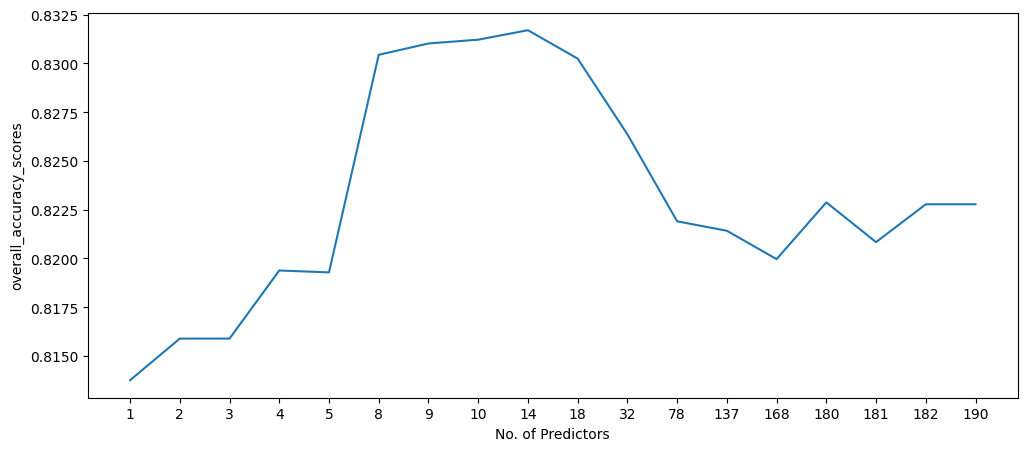

In [13]:
# Plotting the values against
metrics = [precision_scores,recall_scores,roc_auc_scores,f1_scores,overall_accuracy_scores]
metrics_name = ['precision_scores','recall_scores','roc_auc_scores','f1_scores','overall_accuracy_scores']
for k in range(len(metrics)):
    x_val = [str(i) for i in No_of_predictors]
    y_value = metrics[k].copy()
    plt.figure(figsize = (12,5))
    sns.lineplot(x = x_val, y = y_value)
    plt.xlabel("No. of Predictors")
    plt.ylabel(metrics_name[k])
    plt.show()

In [14]:
x = roc_auc_scores.index(max(roc_auc_scores))
xgbc = ", ".join(list_of_predictors[x])
xgbc_score_library = {"ROC AUC Score":round(roc_auc_scores[x],2),"Recall Score":round(recall_scores[x],2),'Precision Score':round(precision_scores[x],2), 'F1 Score':round(f1_scores[x],2), "Overall Accuracy":round(overall_accuracy_scores[x],2),'Optimum predictors':No_of_predictors[x], 'list_of_predictors':xgbc}
list_of_models = []
list_of_models.append('XGBoost')
print(xgbc_score_library)

{'ROC AUC Score': 0.6, 'Recall Score': 0.24, 'Precision Score': 0.63, 'F1 Score': 0.35, 'Overall Accuracy': 0.83, 'Optimum predictors': 9, 'list_of_predictors': 'id55, PerteneceSINCO, FrecuenciaSiniestroSINCO, AnyoPoliza, ContrataLunas, NumeroDanyosMaterialesSINCO, id13_H, id14_MANTENIMIENTO, Cliente_Diverso'}


In [15]:
combined_model_library = []
combined_model_library.append(xgbc_score_library)

## LGBM Classifier

In [16]:
# Fitting the LGBM Classifier Algorithm on the training dataset

lgb = LGBMClassifier()
lgb.fit(X_train,y_train)

# Predicting the target variable using the trained model

y_pred = lgb.predict(X_val)

# Classification Report

print("The Classification report for LGBM Classifier", end = "\n\n")
print(classification_report(y_val, y_pred))

# Importance of each attribute/features

lgb_results = pd.DataFrame(X_train.columns)
lgb_results.rename(columns = {0:"Feature Names"}, inplace = True)
lgb_results['Feature Importance'] = lgb.feature_importances_
print("----------------------------------------------------")
print("The List of Features and their respective importance", end = "\n")
lgb_results

[LightGBM] [Info] Number of positive: 5962, number of negative: 24965
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019950 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31076
[LightGBM] [Info] Number of data points in the train set: 30927, number of used features: 187
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.192777 -> initscore=-1.432069
[LightGBM] [Info] Start training from score -1.432069
The Classification report for LGBM Classifier

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      8372
           1       0.67      0.19      0.30      1937

    accuracy                           0.83     10309
   macro avg       0.76      0.59      0.60     10309
weighted avg       0.81      0.83      0.79     10309

----------------------------------------------------
The List of Features and their respective importance


,Feature Names,Feature Importance
0,id17,10
1,id18,45
2,id21,14
3,id55,127
4,id58_1,10
5,id58_2,19
6,id58_3,3
7,id59,16
8,id60,10
9,id61,16


In [17]:
d = lgb.feature_importances_
r = list(X.columns)
max_imp = max(d)
min_imp = min(d)
val = list(np.linspace(max_imp, min_imp, 50))
f1_scores = []
recall_scores = []
precision_scores = []
roc_auc_scores = []
overall_accuracy_scores = []
list_of_predictors = []
No_of_predictors = []
for value in val:
    u = []
    columns = [u.append(r[i]) for i in range(len(d)) if d[i] >= value]
    # 
    list_of_predictors.append(u)
    No_of_predictors.append(len(u))
    X_training = X_train[u]
    X_value = X_val[u]
    # 
    
    lgb = LGBMClassifier()
    lgb.fit(X_training,y_train)
    y_pred = lgb.predict(X_value)
    recall = recall_score(y_val,y_pred)
    precision = precision_score(y_val,y_pred)
    roc_auc = roc_auc_score(y_val,y_pred)
    Overall_Accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val,y_pred)
    recall_scores.append(recall)
    precision_scores.append(precision)
    roc_auc_scores.append(roc_auc)
    overall_accuracy_scores.append(Overall_Accuracy)
    f1_scores.append(f1)

[LightGBM] [Info] Number of positive: 5962, number of negative: 24965
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12
[LightGBM] [Info] Number of data points in the train set: 30927, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.192777 -> initscore=-1.432069
[LightGBM] [Info] Start training from score -1.432069
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 5962, number of negative: 24965
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002749 seconds.
Y

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[LightGBM] [Info] Number of positive: 5962, number of negative: 24965
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 35
[LightGBM] [Info] Number of data points in the train set: 30927, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.192777 -> initscore=-1.432069
[LightGBM] [Info] Start training from score -1.432069
[LightGBM] [Info] Number of positive: 5962, number of negative: 24965
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 35
[LightGBM] [Info] Number of data points in the train set: 30927, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.192777 -> initscore=-1.432069
[LightGBM]

[LightGBM] [Info] Number of positive: 5962, number of negative: 24965
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000578 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 545
[LightGBM] [Info] Number of data points in the train set: 30927, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.192777 -> initscore=-1.432069
[LightGBM] [Info] Start training from score -1.432069
[LightGBM] [Info] Number of positive: 5962, number of negative: 24965
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 545
[LightGBM] [Info] Number of data points in the train set: 30927, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.192777 -> initscore=-1.432069
[LightGB

[LightGBM] [Info] Number of positive: 5962, number of negative: 24965
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001345 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2702
[LightGBM] [Info] Number of data points in the train set: 30927, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.192777 -> initscore=-1.432069
[LightGBM] [Info] Start training from score -1.432069
[LightGBM] [Info] Number of positive: 5962, number of negative: 24965
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3211
[LightGBM] [Info] Number of data points in the train set: 30927, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.192777 -> initscore=-1.432069
[LightGBM] [Info] Start training from score -1.432069
[LightGBM] [In

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


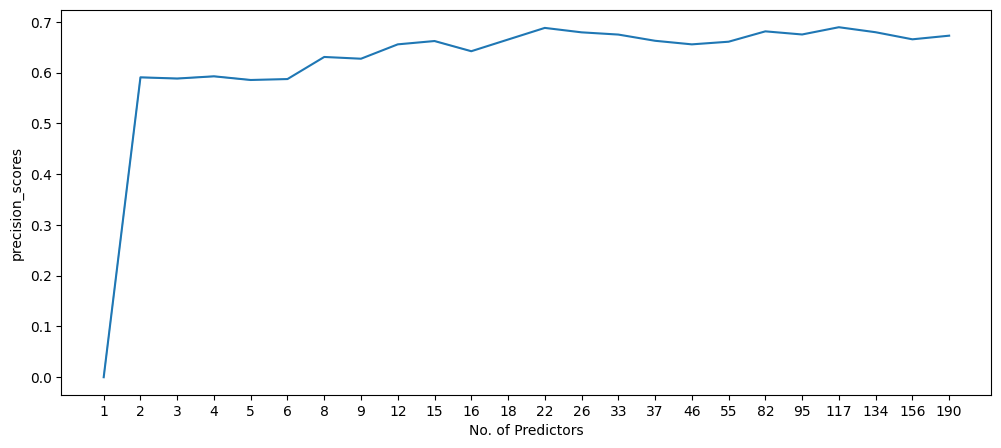

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


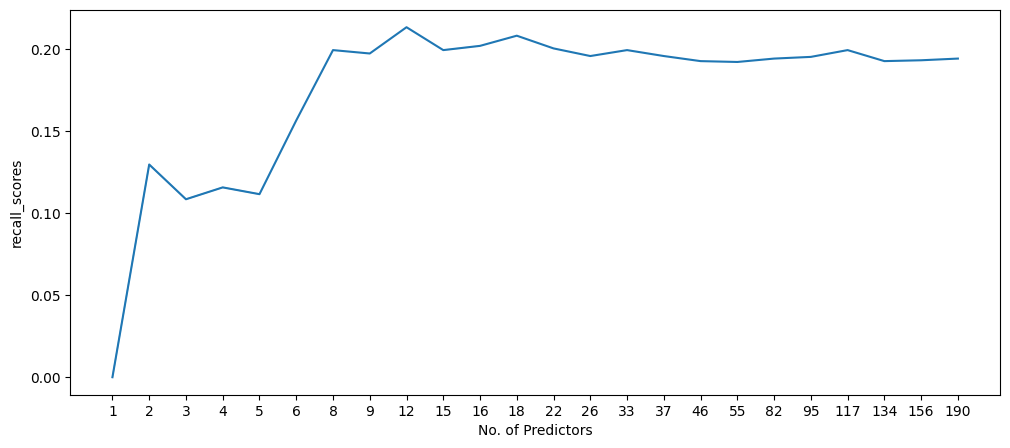

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


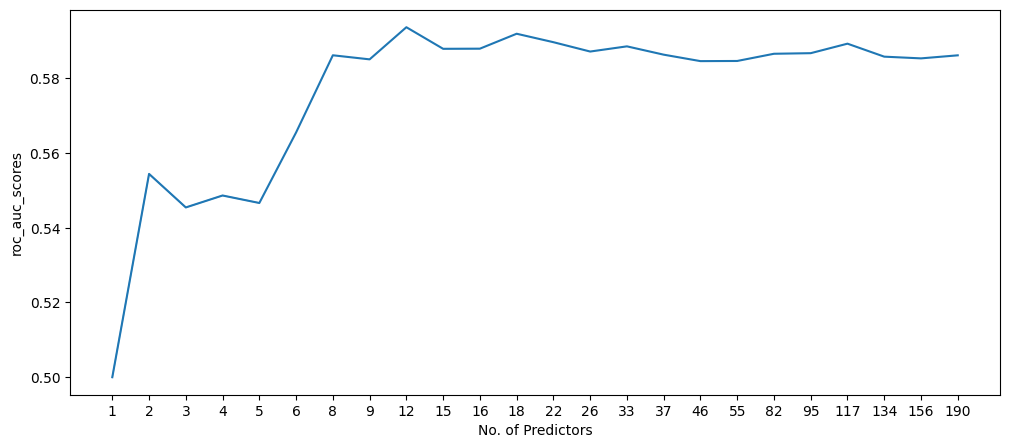

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


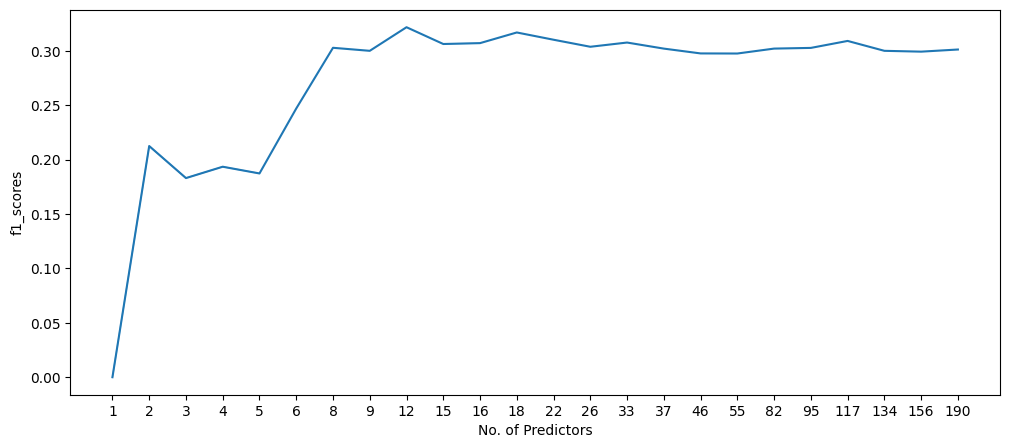

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


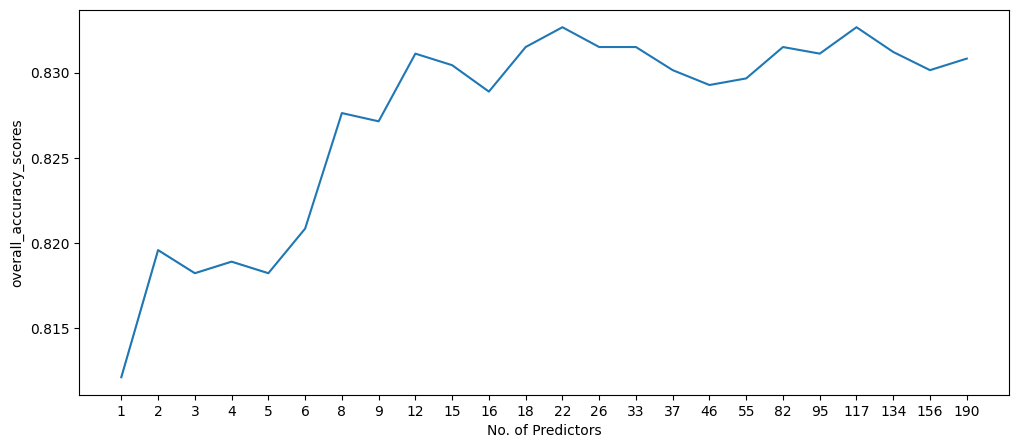

In [18]:
# Plotting the values against
metrics = [precision_scores,recall_scores,roc_auc_scores,f1_scores,overall_accuracy_scores]
metrics_name = ['precision_scores','recall_scores','roc_auc_scores','f1_scores','overall_accuracy_scores']
for k in range(len(metrics)):
    x_val = [str(i) for i in No_of_predictors]
    y_value = metrics[k].copy()
    plt.figure(figsize = (12,5))
    sns.lineplot(x = x_val, y = y_value)
    plt.xlabel("No. of Predictors")
    plt.ylabel(metrics_name[k])
    plt.show()

In [19]:
x = roc_auc_scores.index(max(roc_auc_scores))
lgbc = ", ".join(list_of_predictors[x])
lgbc_score_library = {"ROC AUC Score":round(roc_auc_scores[x],2),"Recall Score":round(recall_scores[x],2),'Precision Score':round(precision_scores[x],2), 'F1 Score':round(f1_scores[x],2), "Overall Accuracy":round(overall_accuracy_scores[x],2),'Optimum predictors':No_of_predictors[x], 'list_of_predictors':lgbc}
list_of_models.append('Light Gradient Boost')
print(lgbc_score_library)

{'ROC AUC Score': 0.59, 'Recall Score': 0.21, 'Precision Score': 0.66, 'F1 Score': 0.32, 'Overall Accuracy': 0.83, 'Optimum predictors': 12, 'list_of_predictors': 'id55, id70, ValorVehiculoMercado, TiempoSINCO, PerteneceSINCO, TiempoMedioSINCO, TiempoSeguroSINCO, FrecuenciaSiniestroSINCO, ScoreCanal, Edad, AnyoPoliza, AntiguedadVehiculo'}


In [20]:
combined_model_library.append(lgbc_score_library)

In [24]:
# Import necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, recall_score, precision_score, roc_auc_score, accuracy_score, f1_score
from sklearn.feature_selection import RFE
import numpy as np
import pandas as pd

# Fitting the MLP Classifier Algorithm on the training dataset
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=0)
mlp.fit(X_train, y_train)

# Predicting the target variable using the trained model
y_pred = mlp.predict(X_val)

# Classification Report
print("The Classification report for MLP Classifier", end = "\n\n")
print(classification_report(y_val, y_pred))

# Feature Importance using Recursive Feature Elimination (RFE)
# Logistic Regression is used here to rank features, as MLP doesn't have direct feature importance
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=log_reg, n_features_to_select=1)
rfe.fit(X_train, y_train)

# Importance of each attribute/features
rfe_ranking = rfe.ranking_
mlp_results = pd.DataFrame(X_train.columns)
mlp_results.rename(columns={0: "Feature Names"}, inplace=True)
mlp_results['Feature Importance (Rank)'] = rfe_ranking
print("----------------------------------------------------")
print("The List of Features and their respective importance (Rank)", end="\n")
print(mlp_results)

# Continue with the rest of the feature selection and evaluation process based on feature importance ranking
d = rfe_ranking  # Use RFE ranking instead of LGBM's feature importance
r = list(X.columns)
max_imp = max(d)
min_imp = min(d)
val = list(np.linspace(max_imp, min_imp, 50))  # Creating thresholds for selecting features
f1_scores = []
recall_scores = []
precision_scores = []
roc_auc_scores = []
overall_accuracy_scores = []
list_of_predictors = []
No_of_predictors = []

for value in val:
    u = []
    columns = [u.append(r[i]) for i in range(len(d)) if d[i] <= value]  # Use ranks to select top features
    list_of_predictors.append(u)
    No_of_predictors.append(len(u))
    X_training = X_train[u]
    X_value = X_val[u]
    
    # Fitting the MLP classifier with selected features
    mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=0)
    mlp.fit(X_training, y_train)
    
    y_pred = mlp.predict(X_value)
    recall = recall_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred)
    Overall_Accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    
    recall_scores.append(recall)
    precision_scores.append(precision)
    roc_auc_scores.append(roc_auc)
    overall_accuracy_scores.append(Overall_Accuracy)
    f1_scores.append(f1)

# Identifying the best number of predictors based on the ROC AUC score
x = roc_auc_scores.index(max(roc_auc_scores))
optimal_predictors = ", ".join(list_of_predictors[x])

# Storing results
mlp_score_library = {
    "ROC AUC Score": round(roc_auc_scores[x], 2),
    "Recall Score": round(recall_scores[x], 2),
    "Precision Score": round(precision_scores[x], 2),
    'F1 Score': round(f1_scores[x], 2),
    "Overall Accuracy": round(overall_accuracy_scores[x], 2),
    'Optimum predictors': No_of_predictors[x],
    'list_of_predictors': optimal_predictors
}

print(mlp_score_library)

The Classification report for MLP Classifier

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      8372
           1       0.20      0.00      0.00      1937

    accuracy                           0.81     10309
   macro avg       0.51      0.50      0.45     10309
weighted avg       0.70      0.81      0.73     10309



C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

----------------------------------------------------
The List of Features and their respective importance (Rank)
                       Feature Names  Feature Importance (Rank)
0                               id17                        157
1                               id18                        100
2                               id21                        171
3                               id55                         41
4                             id58_1                         44
5                             id58_2                         34
6                             id58_3                        161
7                               id59                        123
8                               id60                        122
9                               id61                        164
10                              id70                        102
11              ValorVehiculoMercado                        187
12               SINCOTotalVehiculos                   

C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

{'ROC AUC Score': 0.6, 'Recall Score': 0.41, 'Precision Score': 0.31, 'F1 Score': 0.35, 'Overall Accuracy': 0.72, 'Optimum predictors': 93, 'list_of_predictors': 'id55, id58_1, id58_2, SINCOTotalVehiculos, DGT_001, DGT_002, DGC_002, DGC_006, DGC_008, DGC_010, DGC_011, DGC_012, DGC_013, DGC_014, DGC_018, DGC_019, INE_009, INE_012, INE_013, INE_015, INE_016, INE_017, INE_018, INE_019, INE_020, INE_021, INE_022, INE_047, INE_055, INE_056, INE_057, SEA_001, SEA_002, SEA_004, SEA_006, SEA_009, SEA_010, REP_003, REP_004, REP_005, REP_007, REP_008, NacionalidadID, PerteneceSINCO, TotalMatriculasSINCO, TiempoSeguroSINCO, NV_AutomovilSINCO, NV_MotocicletaSINCO, NV_OtrosSINCO, Edad, Antiguedad_Carnet, AntiguedadVehiculo, id24, id71, SINCOMatriculaIncluida, ContrataLunas, ContrataAsistencia, ContrataDanyosPropios, Conductor2ID, id72_2, riesgo_0, riesgo_4, riesgo_3, riesgo_2, riesgo_1, id13_B, id13_C, id13_D, id13_E, id13_F, id13_G, id13_H, id13_I, id13_Z, id14_EXPANDE, id14_INICIA, id14_MANTENIMI

C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
# Import necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, recall_score, precision_score, roc_auc_score, accuracy_score, f1_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

# Fitting the MLP Classifier Algorithm on the training dataset
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=0)
mlp.fit(X_train, y_train)

# Predicting the target variable using the trained model
y_pred = mlp.predict(X_val)

# Classification Report
print("The Classification report for MLP Classifier", end = "\n\n")
print(classification_report(y_val, y_pred))

# Feature Importance using Recursive Feature Elimination (RFE)
# Logistic Regression is used here to rank features, as MLP doesn't have direct feature importance
log_reg = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=log_reg, n_features_to_select=1)
rfe.fit(X_train, y_train)

# Importance of each attribute/features
rfe_ranking = rfe.ranking_
mlp_results = pd.DataFrame(X_train.columns)
mlp_results.rename(columns={0: "Feature Names"}, inplace=True)
mlp_results['Feature Importance (Rank)'] = rfe_ranking
print("----------------------------------------------------")
print("The List of Features and their respective importance (Rank)", end="\n")
print(mlp_results)

# Continue with the rest of the feature selection and evaluation process based on feature importance ranking
d = rfe_ranking  # Use RFE ranking instead of LGBM's feature importance
r = list(X.columns)
max_imp = max(d)
min_imp = min(d)
val = list(np.linspace(max_imp, min_imp, 50))  # Creating thresholds for selecting features
f1_scores = []
recall_scores = []
precision_scores = []
roc_auc_scores = []
overall_accuracy_scores = []
list_of_predictors = []
No_of_predictors = []

for value in val:
    u = []
    columns = [u.append(r[i]) for i in range(len(d)) if d[i] <= value]  # Use ranks to select top features
    list_of_predictors.append(u)
    No_of_predictors.append(len(u))
    X_training = X_train[u]
    X_value = X_val[u]
    
    # Fitting the MLP classifier with selected features
    mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=0)
    mlp.fit(X_training, y_train)
    
    y_pred = mlp.predict(X_value)
    recall = recall_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred)
    Overall_Accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    
    recall_scores.append(recall)
    precision_scores.append(precision)
    roc_auc_scores.append(roc_auc)
    overall_accuracy_scores.append(Overall_Accuracy)
    f1_scores.append(f1)

# Identifying the best number of predictors based on the ROC AUC score
x = roc_auc_scores.index(max(roc_auc_scores))
optimal_predictors = ", ".join(list_of_predictors[x])

# Storing results
mlp_score_library = {
    "ROC AUC Score": round(roc_auc_scores[x], 2),
    "Recall Score": round(recall_scores[x], 2),
    "Precision Score": round(precision_scores[x], 2),
    'F1 Score': round(f1_scores[x], 2),
    "Overall Accuracy": round(overall_accuracy_scores[x], 2),
    'Optimum predictors': No_of_predictors[x],
    'list_of_predictors': optimal_predictors
}

# Print the results in the desired format
print(mlp_score_library)

The Classification report for MLP Classifier

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      8372
           1       0.20      0.00      0.00      1937

    accuracy                           0.81     10309
   macro avg       0.51      0.50      0.45     10309
weighted avg       0.70      0.81      0.73     10309



C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

----------------------------------------------------
The List of Features and their respective importance (Rank)
                       Feature Names  Feature Importance (Rank)
0                               id17                        157
1                               id18                        100
2                               id21                        171
3                               id55                         41
4                             id58_1                         44
5                             id58_2                         34
6                             id58_3                        161
7                               id59                        123
8                               id60                        122
9                               id61                        164
10                              id70                        102
11              ValorVehiculoMercado                        187
12               SINCOTotalVehiculos                   

C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

{'ROC AUC Score': 0.6, 'Recall Score': 0.41, 'Precision Score': 0.31, 'F1 Score': 0.35, 'Overall Accuracy': 0.72, 'Optimum predictors': 93, 'list_of_predictors': 'id55, id58_1, id58_2, SINCOTotalVehiculos, DGT_001, DGT_002, DGC_002, DGC_006, DGC_008, DGC_010, DGC_011, DGC_012, DGC_013, DGC_014, DGC_018, DGC_019, INE_009, INE_012, INE_013, INE_015, INE_016, INE_017, INE_018, INE_019, INE_020, INE_021, INE_022, INE_047, INE_055, INE_056, INE_057, SEA_001, SEA_002, SEA_004, SEA_006, SEA_009, SEA_010, REP_003, REP_004, REP_005, REP_007, REP_008, NacionalidadID, PerteneceSINCO, TotalMatriculasSINCO, TiempoSeguroSINCO, NV_AutomovilSINCO, NV_MotocicletaSINCO, NV_OtrosSINCO, Edad, Antiguedad_Carnet, AntiguedadVehiculo, id24, id71, SINCOMatriculaIncluida, ContrataLunas, ContrataAsistencia, ContrataDanyosPropios, Conductor2ID, id72_2, riesgo_0, riesgo_4, riesgo_3, riesgo_2, riesgo_1, id13_B, id13_C, id13_D, id13_E, id13_F, id13_G, id13_H, id13_I, id13_Z, id14_EXPANDE, id14_INICIA, id14_MANTENIMI

In [28]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, recall_score, precision_score, roc_auc_score, accuracy_score, f1_score
from sklearn.feature_selection import RFE
import numpy as np
import pandas as pd

# Fitting the Logistic Regression Algorithm on the training dataset
log_reg = LogisticRegression(max_iter=500, random_state=0)
log_reg.fit(X_train, y_train)

# Predicting the target variable using the trained model
y_pred = log_reg.predict(X_val)

# Classification Report for Logistic Regression
print("The Classification report for Logistic Regression", end="\n\n")
print(classification_report(y_val, y_pred))

# Feature Importance using Recursive Feature Elimination (RFE)
rfe = RFE(estimator=log_reg, n_features_to_select=1)  # RFE with Logistic Regression to rank features
rfe.fit(X_train, y_train)

# Importance of each attribute/features
rfe_ranking = rfe.ranking_
logreg_results = pd.DataFrame(X_train.columns)
logreg_results.rename(columns={0: "Feature Names"}, inplace=True)
logreg_results['Feature Importance (Rank)'] = rfe_ranking
print("----------------------------------------------------")
print("The List of Features and their respective importance (Rank)", end="\n")
print(logreg_results)

# Continue with the rest of the feature selection and evaluation process based on feature importance ranking
d = rfe_ranking  # Use RFE ranking instead of MLP's feature importance
r = list(X.columns)
max_imp = max(d)
min_imp = min(d)
val = list(np.linspace(max_imp, min_imp, 50))  # Creating thresholds for selecting features
f1_scores = []
recall_scores = []
precision_scores = []
roc_auc_scores = []
overall_accuracy_scores = []
list_of_predictors = []
No_of_predictors = []

for value in val:
    u = []
    columns = [u.append(r[i]) for i in range(len(d)) if d[i] <= value]  # Use ranks to select top features
    list_of_predictors.append(u)
    No_of_predictors.append(len(u))
    X_training = X_train[u]
    X_value = X_val[u]
    
    # Fitting the Logistic Regression classifier with selected features
    log_reg = LogisticRegression(max_iter=500, random_state=0)
    log_reg.fit(X_training, y_train)
    
    y_pred = log_reg.predict(X_value)
    recall = recall_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred)
    Overall_Accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    
    recall_scores.append(recall)
    precision_scores.append(precision)
    roc_auc_scores.append(roc_auc)
    overall_accuracy_scores.append(Overall_Accuracy)
    f1_scores.append(f1)

# Identifying the best number of predictors based on the ROC AUC score
x = roc_auc_scores.index(max(roc_auc_scores))
optimal_predictors = ", ".join(list_of_predictors[x])

# Storing results
logreg_score_library = {
    "ROC AUC Score": round(roc_auc_scores[x], 2),
    "Recall Score": round(recall_scores[x], 2),
    "Precision Score": round(precision_scores[x], 2),
    'F1 Score': round(f1_scores[x], 2),
    "Overall Accuracy": round(overall_accuracy_scores[x], 2),
    'Optimum predictors': No_of_predictors[x],
    'list_of_predictors': optimal_predictors
}

# Print the results in the desired format
print(logreg_score_library)

C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The Classification report for Logistic Regression

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      8372
           1       0.00      0.00      0.00      1937

    accuracy                           0.81     10309
   macro avg       0.41      0.50      0.45     10309
weighted avg       0.66      0.81      0.73     10309



C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

----------------------------------------------------
The List of Features and their respective importance (Rank)
                       Feature Names  Feature Importance (Rank)
0                               id17                        134
1                               id18                         97
2                               id21                        152
3                               id55                         42
4                             id58_1                         43
5                             id58_2                         26
6                             id58_3                        132
7                               id59                        104
8                               id60                        103
9                               id61                        158
10                              id70                         92
11              ValorVehiculoMercado                        162
12               SINCOTotalVehiculos                   

C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWar

C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

{'ROC AUC Score': 0.52, 'Recall Score': 0.04, 'Precision Score': 0.58, 'F1 Score': 0.07, 'Overall Accuracy': 0.81, 'Optimum predictors': 55, 'list_of_predictors': 'id55, id58_1, id58_2, SINCOTotalVehiculos, DGT_001, DGT_002, DGC_008, DGC_014, DGC_015, DGC_016, INE_008, SEA_009, SEA_010, REP_002, REP_003, REP_008, TotalMatriculasSINCO, NV_OtrosSINCO, AntiguedadVehiculo, id24, id71, SINCOMatriculaIncluida, ContrataLunas, ContrataAsistencia, ContrataDanyosPropios, Conductor2ID, NumeroDanyosMaterialesSINCO, id72_2, riesgo_4, riesgo_2, id13_C, id13_D, id13_E, id13_F, id13_H, id13_I, id14_EXPANDE, id14_INICIA, id14_MANTENIMIENTO, id14_OPTIMA, id14_PROYECTA, id15_OFIC_ENTIDAD, id54_ANUAL_EFECTIVO, id54_SEMESTRAL_DOMICILIADO, id54_SEMESTRAL_EFECTIVO, Subramo_CICLOMOTOR, Subramo_COMERCI_MENOS_DE_3_5TN_, Subramo_MOTOCICLETA, Subramo_TURISMO_NO_CUADRICICLOS, TipoConsultaSINCO_Tomador, NotaLUA_C, NotaLUA_D, NotaLUA_E, NotaLUA_F, Cliente_Diverso'}


C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Nishant Moona\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

## Decision Tree Classifier

In [21]:
# Fitting the LGBM Classifier Algorithm on the training dataset

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

# Predicting the target variable using the trained model

y_pred = dtc.predict(X_val)

# Classification Report

print("The Classification report for Decision Tree Classifier", end = "\n\n")
print(classification_report(y_val, y_pred))

# Importance of each attribute/features

dtc_results = pd.DataFrame(X_train.columns)
dtc_results.rename(columns = {0:"Feature Names"}, inplace = True)
dtc_results['Feature Importance'] = dtc.feature_importances_
print("----------------------------------------------------")
print("The List of Features and their respective importance", end = "\n")
dtc_results

The Classification report for Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      8372
           1       0.30      0.33      0.32      1937

    accuracy                           0.73     10309
   macro avg       0.57      0.58      0.57     10309
weighted avg       0.74      0.73      0.74     10309

----------------------------------------------------
The List of Features and their respective importance


,Feature Names,Feature Importance
0,id17,0.003554
1,id18,0.013457
2,id21,0.005362
3,id55,0.070583
4,id58_1,0.002390
5,id58_2,0.006504
6,id58_3,0.002207
7,id59,0.004628
8,id60,0.005803
9,id61,0.008163


In [22]:
d = dtc.feature_importances_
r = list(X.columns)
max_imp = max(d)
min_imp = min(d)
val = list(np.linspace(max_imp, min_imp, 50))
f1_scores = []
recall_scores = []
precision_scores = []
roc_auc_scores = []
overall_accuracy_scores = []
list_of_predictors = []
No_of_predictors = []
for value in val:
    u = []
    columns = [u.append(r[i]) for i in range(len(d)) if d[i] >= value]
    # 
    list_of_predictors.append(u)
    No_of_predictors.append(len(u))
    X_training = X_train[u]
    X_value = X_val[u]
    # 
    
    dtc = DecisionTreeClassifier()
    dtc.fit(X_training,y_train)
    y_pred = dtc.predict(X_value)
    recall = recall_score(y_val,y_pred)
    precision = precision_score(y_val,y_pred)
    roc_auc = roc_auc_score(y_val,y_pred)
    Overall_Accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val,y_pred)
    recall_scores.append(recall)
    precision_scores.append(precision)
    roc_auc_scores.append(roc_auc)
    overall_accuracy_scores.append(Overall_Accuracy)
    f1_scores.append(f1)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


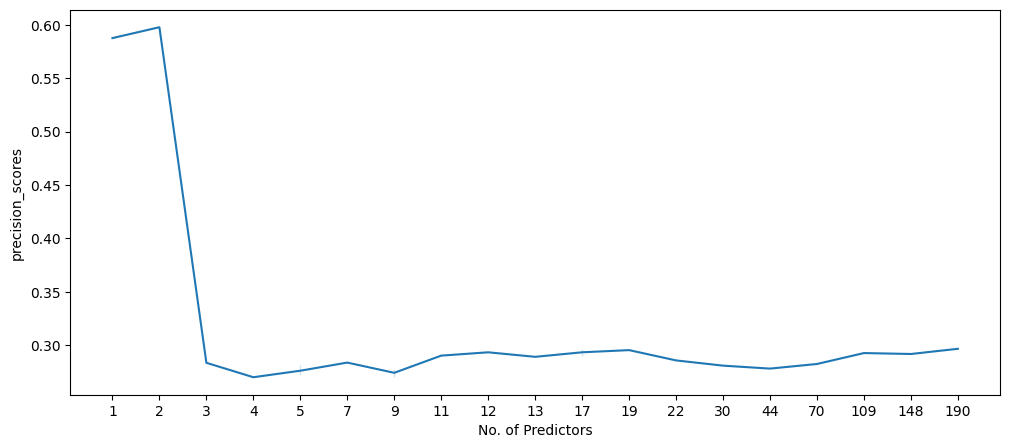

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


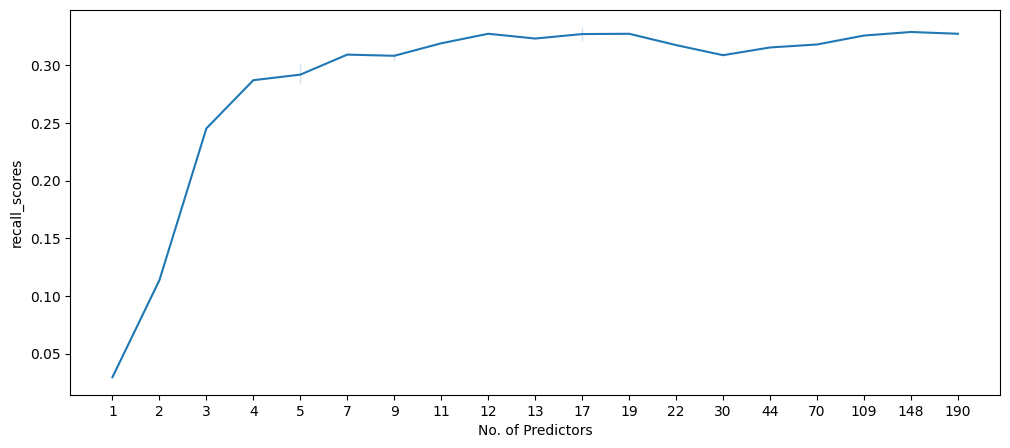

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


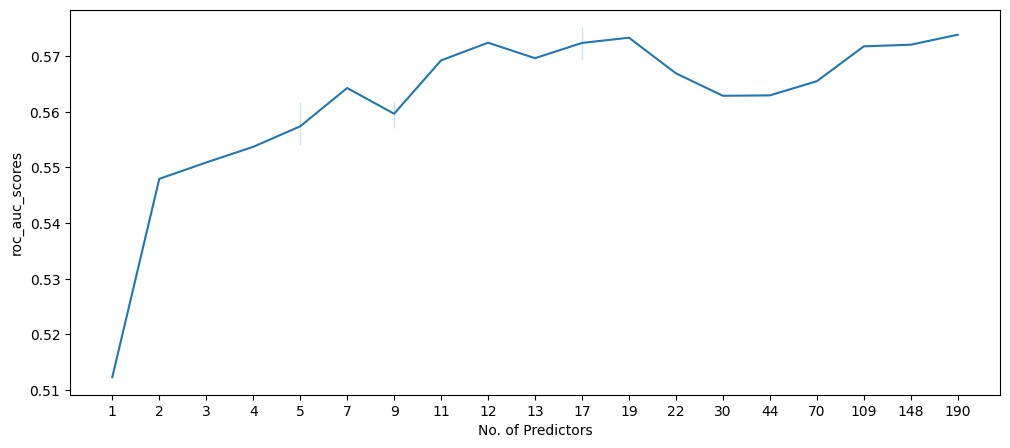

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


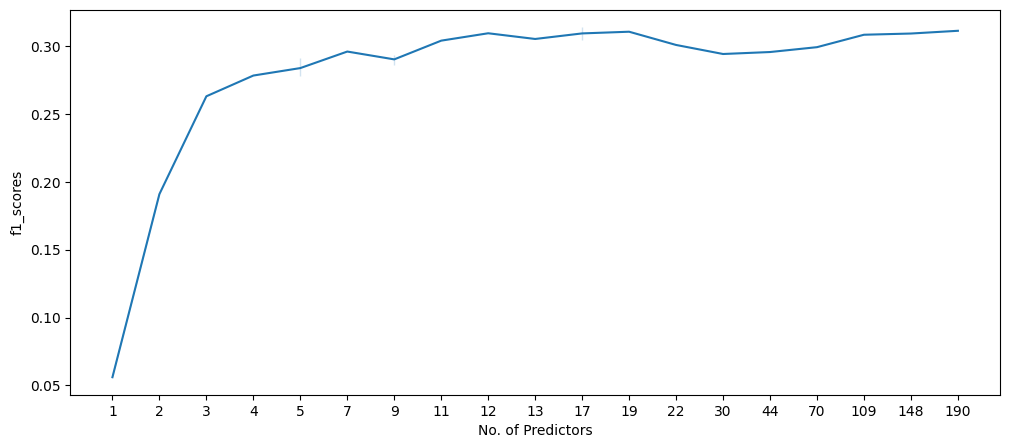

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


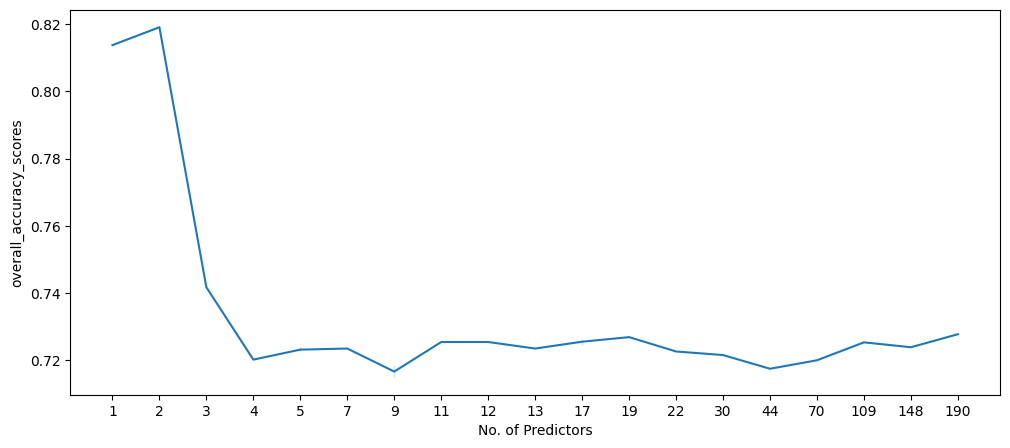

In [23]:
# Plotting the values against
metrics = [precision_scores,recall_scores,roc_auc_scores,f1_scores,overall_accuracy_scores]
metrics_name = ['precision_scores','recall_scores','roc_auc_scores','f1_scores','overall_accuracy_scores']
for k in range(len(metrics)):
    x_val = [str(i) for i in No_of_predictors]
    y_value = metrics[k].copy()
    plt.figure(figsize = (12,5))
    sns.lineplot(x = x_val, y = y_value)
    plt.xlabel("No. of Predictors")
    plt.ylabel(metrics_name[k])
    plt.show()

In [24]:
x = roc_auc_scores.index(max(roc_auc_scores))
detc = ", ".join(list_of_predictors[x])
detc_score_library = {"ROC AUC Score":round(roc_auc_scores[x],2),"Recall Score":round(recall_scores[x],2),'Precision Score':round(precision_scores[x],2), 'F1 Score':round(f1_scores[x],2), "Overall Accuracy":round(overall_accuracy_scores[x],2),'Optimum predictors':No_of_predictors[x], 'list_of_predictors':detc}
list_of_models.append('Decision Tree Classifier')
print(detc_score_library)

{'ROC AUC Score': 0.58, 'Recall Score': 0.33, 'Precision Score': 0.3, 'F1 Score': 0.31, 'Overall Accuracy': 0.73, 'Optimum predictors': 17, 'list_of_predictors': 'id18, id55, id70, ValorVehiculoMercado, SINCOTotalVehiculos, ScoreAda, CiaAnteriorID, PerteneceSINCO, TiempoMedioSINCO, TiempoSeguroSINCO, TiempoSINCO_Anos, FrecuenciaSiniestroSINCO, ScoreCanal, Edad, Antiguedad_Carnet, AnyoPoliza, AntiguedadVehiculo'}


In [25]:
combined_model_library.append(detc_score_library)

## Extra Trees Classifier

In [26]:
# Fitting the Extra Tree Classifier Algorithm on the training dataset

etc = ExtraTreesClassifier(n_jobs = -1)
etc.fit(X_train,y_train)

# Predicting the target variable using the trained model

y_pred = etc.predict(X_val)

# Classification Report

print("The Classification report for Extra Tree Classifier", end = "\n\n")
print(classification_report(y_val, y_pred))

# Importance of each attribute/features

etc_results = pd.DataFrame(X_train.columns)
etc_results.rename(columns = {0:"Feature Names"}, inplace = True)
etc_results['Feature Importance'] = etc.feature_importances_
print("----------------------------------------------------")
print("The List of Features and their respective importance", end = "\n")
etc_results

The Classification report for Extra Tree Classifier

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      8372
           1       0.39      0.02      0.04      1937

    accuracy                           0.81     10309
   macro avg       0.60      0.51      0.47     10309
weighted avg       0.74      0.81      0.73     10309

----------------------------------------------------
The List of Features and their respective importance


,Feature Names,Feature Importance
0,id17,0.006282
1,id18,0.008401
2,id21,0.004238
3,id55,0.026074
4,id58_1,0.007321
5,id58_2,0.009592
6,id58_3,0.004199
7,id59,0.006653
8,id60,0.006622
9,id61,0.006390


In [27]:
d = etc.feature_importances_
r = list(X.columns)
max_imp = max(d)
min_imp = min(d)
val = list(np.linspace(max_imp, min_imp, 50))
f1_scores = []
recall_scores = []
precision_scores = []
roc_auc_scores = []
overall_accuracy_scores = []
list_of_predictors = []
No_of_predictors = []
for value in val:
    u = []
    columns = [u.append(r[i]) for i in range(len(d)) if d[i] >= value]
    # 
    list_of_predictors.append(u)
    No_of_predictors.append(len(u))
    X_training = X_train[u]
    X_value = X_val[u]
    # 
    
    etc = ExtraTreesClassifier(n_jobs = -1)
    etc.fit(X_training,y_train)
    y_pred = etc.predict(X_value)
    recall = recall_score(y_val,y_pred)
    precision = precision_score(y_val,y_pred)
    roc_auc = roc_auc_score(y_val,y_pred)
    Overall_Accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val,y_pred)
    recall_scores.append(recall)
    precision_scores.append(precision)
    roc_auc_scores.append(roc_auc)
    overall_accuracy_scores.append(Overall_Accuracy)
    f1_scores.append(f1)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


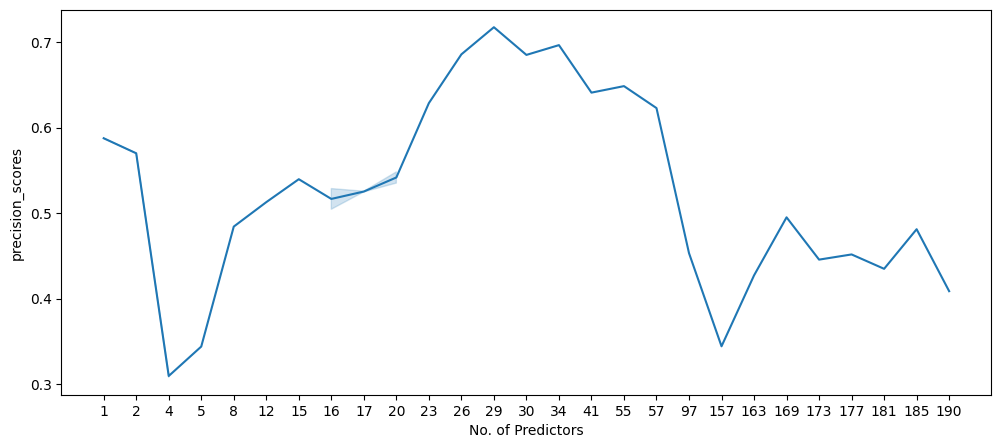

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


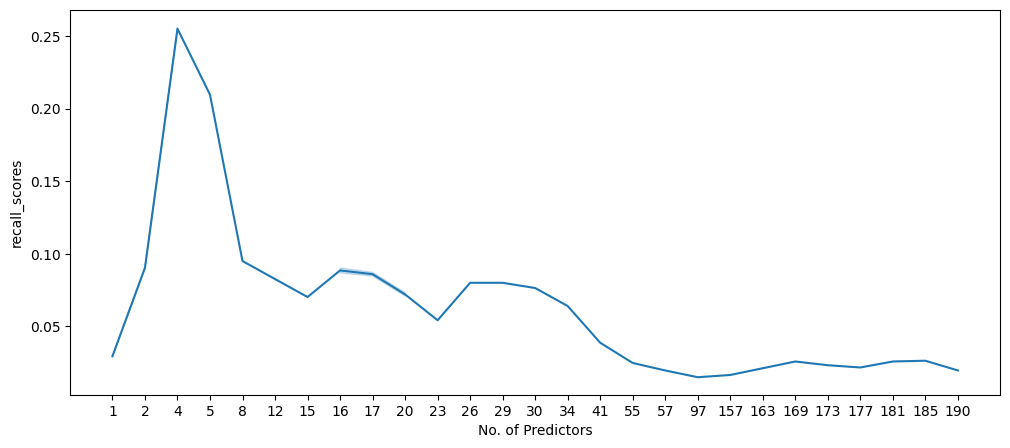

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


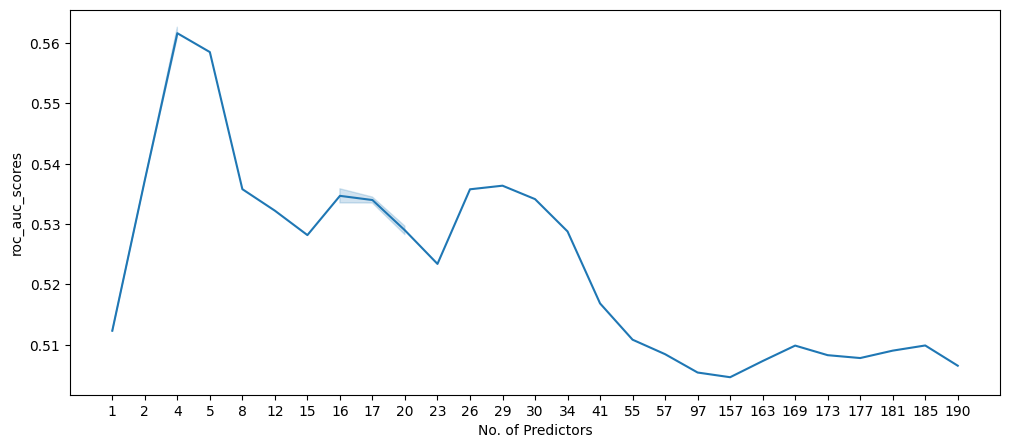

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


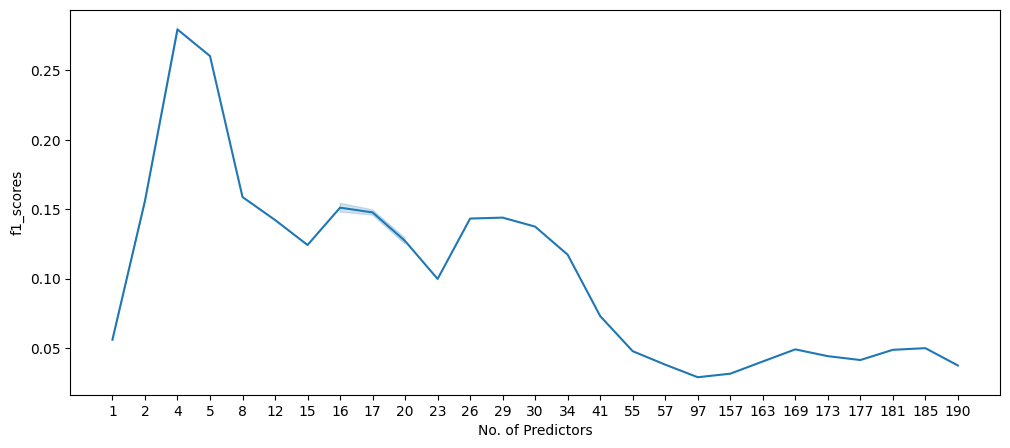

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


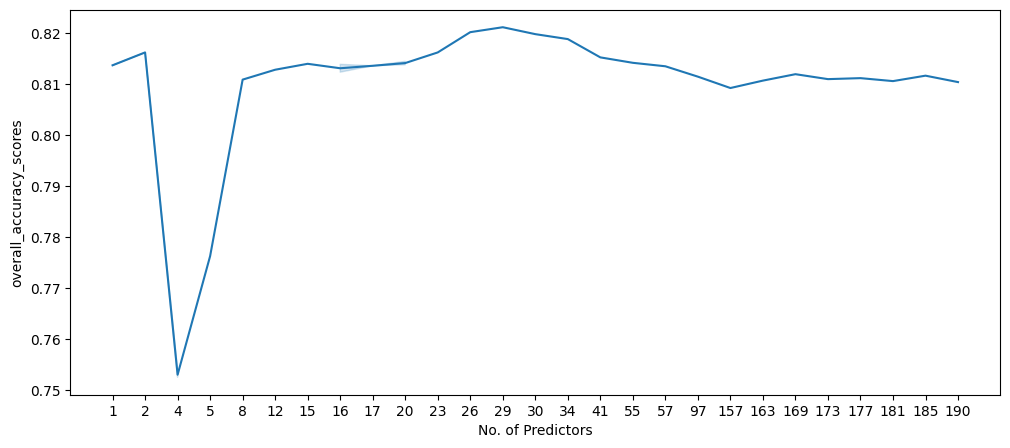

In [28]:
# Plotting the values against
metrics = [precision_scores,recall_scores,roc_auc_scores,f1_scores, overall_accuracy_scores]
metrics_name = ['precision_scores','recall_scores','roc_auc_scores','f1_scores','overall_accuracy_scores']
for k in range(len(metrics)):
    x_val = [str(i) for i in No_of_predictors]
    y_value = metrics[k].copy()
    plt.figure(figsize = (12,5))
    sns.lineplot(x = x_val, y = y_value)
    plt.xlabel("No. of Predictors")
    plt.ylabel(metrics_name[k])
    plt.show()

In [29]:
x = roc_auc_scores.index(max(roc_auc_scores))
etrc = ", ".join(list_of_predictors[x])
etrc_score_library = {"ROC AUC Score":round(roc_auc_scores[x],2),"Recall Score":round(recall_scores[x],2),'Precision Score':round(precision_scores[x],2), 'F1 Score':round(f1_scores[x],2), "Overall Accuracy":round(overall_accuracy_scores[x],2),'Optimum predictors':No_of_predictors[x], 'list_of_predictors':etrc}
list_of_models.append('Extra Trees Classifier')
print(etrc_score_library)

{'ROC AUC Score': 0.56, 'Recall Score': 0.26, 'Precision Score': 0.31, 'F1 Score': 0.28, 'Overall Accuracy': 0.75, 'Optimum predictors': 4, 'list_of_predictors': 'id55, TiempoMedioSINCO, AnyoPoliza, Cliente_Diverso'}


In [30]:
combined_model_library.append(etrc_score_library)

## Random Forest Classifier

In [31]:
# Fitting the Random Forest Classifier Algorithm on the training dataset

rfc = RandomForestClassifier(n_jobs = -1)
rfc.fit(X_train,y_train)

# Predicting the target variable using the trained model

y_pred = lgb.predict(X_val)

# Classification Report

print("The Classification report for LGBM Classifier", end = "\n\n")
print(classification_report(y_val, y_pred))

# Importance of each attribute/features

rfc_results = pd.DataFrame(X_train.columns)
rfc_results.rename(columns = {0:"Feature Names"}, inplace = True)
rfc_results['Feature Importance'] = rfc.feature_importances_
print("----------------------------------------------------")
print("The List of Features and their respective importance", end = "\n")
rfc_results

The Classification report for LGBM Classifier

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      8372
           1       0.67      0.19      0.30      1937

    accuracy                           0.83     10309
   macro avg       0.76      0.59      0.60     10309
weighted avg       0.81      0.83      0.79     10309

----------------------------------------------------
The List of Features and their respective importance


,Feature Names,Feature Importance
0,id17,0.005457
1,id18,0.012199
2,id21,0.005343
3,id55,0.041192
4,id58_1,0.003334
5,id58_2,0.006013
6,id58_3,0.002190
7,id59,0.005982
8,id60,0.006163
9,id61,0.006016


In [32]:
d = rfc.feature_importances_
r = list(X.columns)
max_imp = max(d)
min_imp = min(d)
val = list(np.linspace(max_imp, min_imp, 50))
f1_scores = []
recall_scores = []
precision_scores = []
roc_auc_scores = []
overall_accuracy_scores = []
list_of_predictors = []
No_of_predictors = []
for value in val:
    u = []
    columns = [u.append(r[i]) for i in range(len(d)) if d[i] >= value]
    # 
    list_of_predictors.append(u)
    No_of_predictors.append(len(u))
    X_training = X_train[u]
    X_value = X_val[u]
    # 
    
    rfc = RandomForestClassifier(n_jobs = -1)
    rfc.fit(X_training,y_train)
    y_pred = rfc.predict(X_value)
    recall = recall_score(y_val,y_pred)
    precision = precision_score(y_val,y_pred)
    roc_auc = roc_auc_score(y_val,y_pred)
    Overall_Accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val,y_pred)
    recall_scores.append(recall)
    precision_scores.append(precision)
    roc_auc_scores.append(roc_auc)
    overall_accuracy_scores.append(Overall_Accuracy)
    f1_scores.append(f1)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


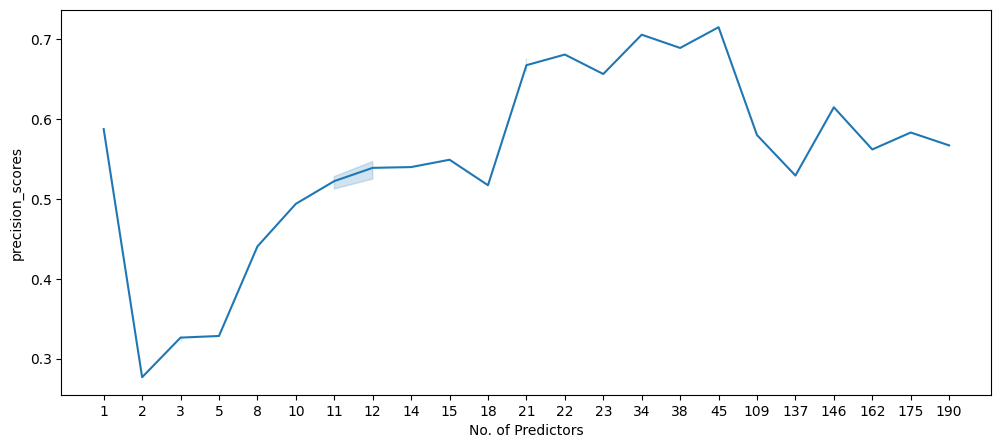

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


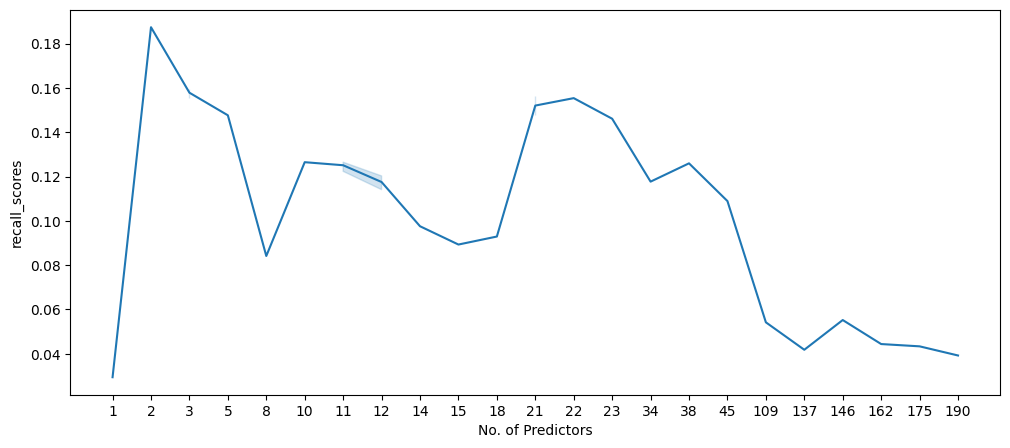

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


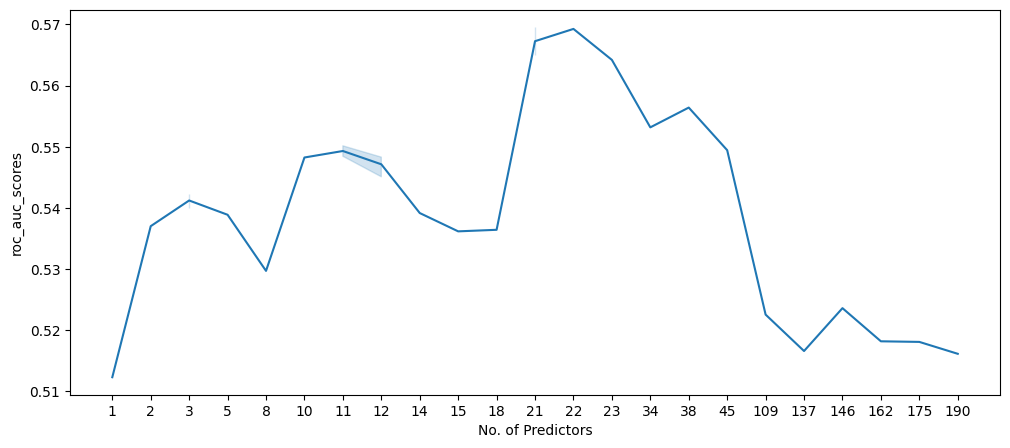

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


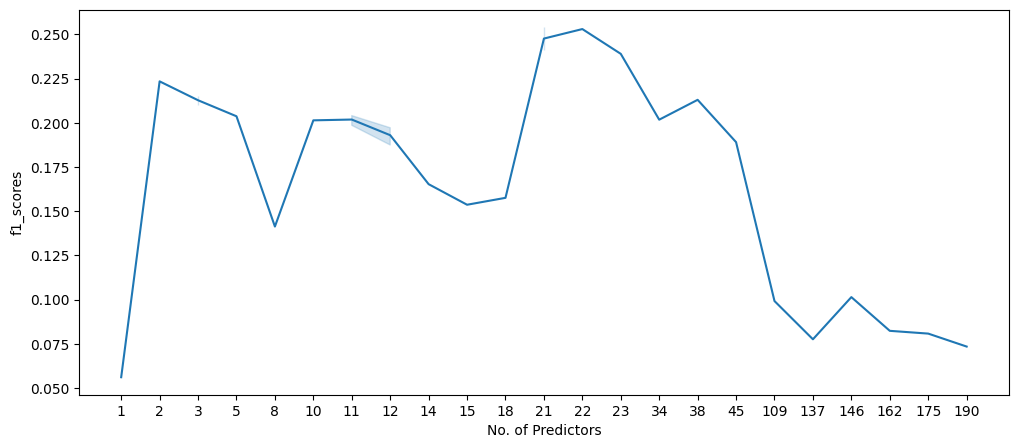

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


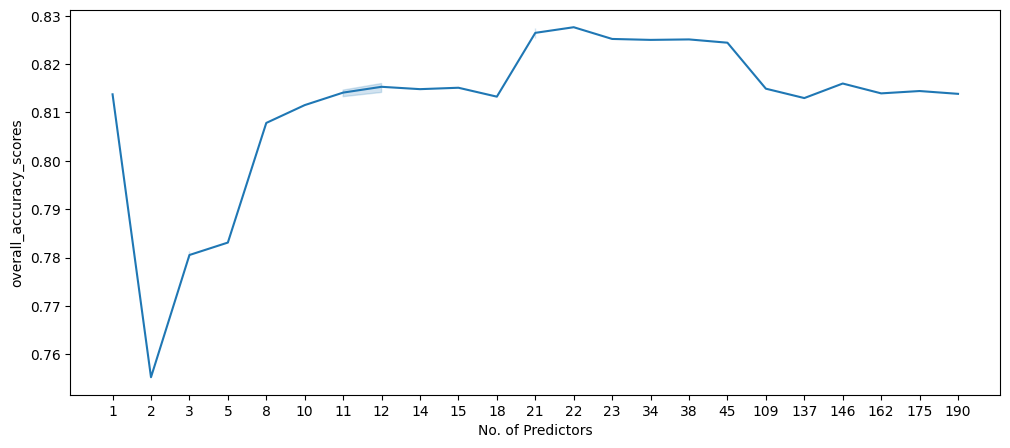

In [33]:
# Plotting the values against
metrics = [precision_scores,recall_scores,roc_auc_scores,f1_scores,overall_accuracy_scores]
metrics_name = ['precision_scores','recall_scores','roc_auc_scores','f1_scores','overall_accuracy_scores']
for k in range(len(metrics)):
    x_val = [str(i) for i in No_of_predictors]
    y_value = metrics[k].copy()
    plt.figure(figsize = (12,5))
    sns.lineplot(x = x_val, y = y_value)
    plt.xlabel("No. of Predictors")
    plt.ylabel(metrics_name[k])
    plt.show()

In [34]:
x = roc_auc_scores.index(max(roc_auc_scores))
rfc = ", ".join(list_of_predictors[x])
rfc_score_library = {"ROC AUC Score":round(roc_auc_scores[x],2),"Recall Score":round(recall_scores[x],2),'Precision Score':round(precision_scores[x],2), 'F1 Score':round(f1_scores[x],2), "Overall Accuracy":round(overall_accuracy_scores[x],2),'Optimum predictors':No_of_predictors[x], 'list_of_predictors':rfc}
list_of_models.append('Random Forest')
print(rfc_score_library)

{'ROC AUC Score': 0.57, 'Recall Score': 0.16, 'Precision Score': 0.68, 'F1 Score': 0.25, 'Overall Accuracy': 0.83, 'Optimum predictors': 21, 'list_of_predictors': 'id18, id55, id70, ValorVehiculoMercado, SINCOTotalVehiculos, ScoreAda, CiaAnteriorID, TiempoSINCO, TotalMatriculasSINCO, TiempoMedioSINCO, TiempoSeguroSINCO, TiempoSINCO_Anos, FrecuenciaDanyosMateriales, FrecuenciaSiniestroSINCO, NV_AutomovilSINCO, ScoreCanal, Edad, Antiguedad_Carnet, AnyoPoliza, AntiguedadVehiculo, Cliente_Diverso'}


In [35]:
combined_model_library.append(rfc_score_library)

In [36]:
df_model_summary = pd.DataFrame(combined_model_library)

In [37]:
df_model_summary['Model Type'] = list_of_models

In [38]:
df_model_summary = df_model_summary[['Model Type','ROC AUC Score', 'Recall Score', 'Precision Score', 'F1 Score',
       'Overall Accuracy', 'Optimum predictors', 'list_of_predictors',
       ]]

In [39]:
df_model_summary

,Model Type,ROC AUC Score,Recall Score,Precision Score,F1 Score,Overall Accuracy,Optimum predictors,list_of_predictors
0,XGBoost,0.60,0.24,0.63,0.35,0.83,9,"id55, PerteneceSINCO, FrecuenciaSiniestroSINCO..."
1,Light Gradient Boost,0.59,0.21,0.66,0.32,0.83,12,"id55, id70, ValorVehiculoMercado, TiempoSINCO,..."
2,Decision Tree Classifier,0.58,0.33,0.30,0.31,0.73,17,"id18, id55, id70, ValorVehiculoMercado, SINCOT..."
3,Extra Trees Classifier,0.56,0.26,0.31,0.28,0.75,4,"id55, TiempoMedioSINCO, AnyoPoliza, Cliente_Di..."
4,Random Forest,0.57,0.16,0.68,0.25,0.83,21,"id18, id55, id70, ValorVehiculoMercado, SINCOT..."


In [40]:
df_model_summary.to_csv("df_model_1_summary.csv")

In [41]:
# Selecting the best model out of all the models

model_used = {'XGBoost':xgb, 'Light Gradient Boost':lgb, 'Decision Tree Classifier':dtc, 'Extra Trees Classifier':etc, 'Random Forest':rfc}
index_no = df_model_summary[df_model_summary['ROC AUC Score'] == df_model_summary['ROC AUC Score'].max()].index[0]
best_model = model_used[df_model_summary[df_model_summary['ROC AUC Score'] == df_model_summary['ROC AUC Score'].max()].loc[index_no,'Model Type']]

In [42]:
# Selecting the list of predictors for the best model
predictors = df_model_summary.loc[index_no, 'list_of_predictors']
imp_pred_list = predictors.split(", ")

# Selecting the best modelout of all the models

best_model_name = df_model_summary.loc[index_no,"Model Type"]
best_model = model_used[best_model_name]

#imp_pred_list.append('BMA_pol_auto')

print("The model that performs best is:",df_model_summary.loc[index_no,"Model Type"] )
print("The optimum predictors for this model are:\n")
for i in range(len(imp_pred_list)):
    print(i+1,".",imp_pred_list[i], end = '\n')

The model that performs best is: XGBoost
The optimum predictors for this model are:

1 . id55
2 . PerteneceSINCO
3 . FrecuenciaSiniestroSINCO
4 . AnyoPoliza
5 . ContrataLunas
6 . NumeroDanyosMaterialesSINCO
7 . id13_H
8 . id14_MANTENIMIENTO
9 . Cliente_Diverso


In [43]:
# Preparation of the Final dataset

df_final = X_test.copy()
df_final['Actual Classification'] = y_test

# Dropping the target column 'BMA_pol_auto' from the test dataset for prediction
X_test = X_test.drop('BMA_pol_auto', axis = 1)
y_pred_best = best_model.predict(X_test)

# Incorporating the predicted values into the Final dataset
df_final['Predicted_profitability'] =  y_pred_best
df_final.reset_index(drop = True, inplace = True)

In [44]:
print("The ROC_AUC Score for the predicted dataset is:", round(roc_auc_score(y_test,y_pred_best),2))
print(confusion_matrix(y_test,y_pred_best))

The ROC_AUC Score for the predicted dataset is: 0.59
[[8029  299]
 [1539  443]]


In [45]:
df_final['Predicted BMA'] = [df_final.loc[i,'BMA_pol_auto'] if df_final.loc[i,'Predicted_profitability'] == 0 else 0 for i in range(df_final.shape[0]) ]

In [46]:
df_final.to_csv("Model_1.csv")

In [47]:
# Total number of people offered policy before ML model implementation

original_count = df_final.shape[0]
print("Total number of people who were provided insurance before model implementation: ",original_count)

# Total number of people offered policy after ML model implementation

Final_count = df_final.shape[0] - df_final['Predicted_profitability'].sum()
print("Total number of people who were provided insurance after model implementation: ",Final_count)

# Percentage increment  
print("Percentage of people rejected: ",round(((original_count-Final_count)/original_count)*100,2),"%")

Total number of people who were provided insurance before model implementation:  10310
Total number of people who were provided insurance after model implementation:  9568
Percentage of people rejected:  7.2 %


In [48]:
# Total Revenue Calculation

Original_revenue = round(df_final['BMA_pol_auto'].sum(),0)
Final_revenue = round(df_final['Predicted BMA'].sum(),0)

# Revenue Calculation per person

Initial = round(Original_revenue/original_count,2)
Final = round(Final_revenue/Final_count,2)

# Final Results 

print("The total revenue before application of ML Model is: ",Original_revenue)
print("The total revenue after application of ML Model is: ", Final_revenue)
print("Revenue per customer before application of ML is: ", round(Original_revenue/original_count,2))
print("Revenue per customer after application of ML is: ", round(Final_revenue/Final_count,2))
print(f"Revenue per customer increased by {round(Final/Initial,2)} times after application of ML model")

The total revenue before application of ML Model is:  573891.0
The total revenue after application of ML Model is:  1026303.0
Revenue per customer before application of ML is:  55.66
Revenue per customer after application of ML is:  107.26
Revenue per customer increased by 1.93 times after application of ML model


In [49]:
print(classification_report(y_test,y_pred_best))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      8328
           1       0.60      0.22      0.33      1982

    accuracy                           0.82     10310
   macro avg       0.72      0.59      0.61     10310
weighted avg       0.79      0.82      0.79     10310

